# 準備

In [1]:
import sys
sys.path.append('../')
from setting import *

In [3]:
COMMENT = ''

In [4]:
file_input = data_path/'tmp/1206test2.csv'

In [5]:
df_info = pd.read_csv(data_path / 'inter/race_info_inter.csv', usecols=['race_id', 'race_class_prize'])
print(df_info.shape)
df_info.head(1)

(27125, 2)


,race_id,race_class_prize
0,201001020110,オープン


In [6]:
use_race_id = set(df_info.loc[~df_info.race_class_prize.isin({'新馬'})].race_id)

In [7]:
dt_now = datetime.datetime.now().strftime('%Y%m%d%H%M')
dt_now

'202012061919'

In [8]:
log_path = data_path /'logs' /dt_now
os.makedirs(log_path/'image', exist_ok=True)

# 読み込み

In [14]:
df_main = pd.read_csv(file_input, engine='python')
df_main = df_main.query('race_id in @use_race_id')
print(df_main.shape)
df_main.head(2)

(148567, 37)


,arrival,course_num,馬名,handy_weight,race_id,age,weight,race_date,first_data_flg,pre_weight_3_mean,weight_null_flg,weight_change_rate,handy_rate,interval_days,last_turf_flg,distance_diff,last_wheter,last_condition,is_first_in_prize,last_arrival,p2_arrival,p3_arrival,last_speed,last_uphill_speed,same_cluster_flg,last_uphill,last_uphill_samecc,got_prize,is_same_place,gender_セ,gender_牝,gender_牡,place_なし,place_地,place_外,place_東,place_西
0,1,7,エネアド,54.0,201205030110,3,436.0,2012-06-02,0,438.666667,0,0.993921,0.123853,41.0,1,0.0,2.0,1.0,1,1.0,NaN,NaN,58428.0,0.000587,0,34.3,34.3,700.0,1,0,0,1,0,0,0,1,0
1,4,12,ショウナンバーズ,57.0,201205030109,4,496.0,2012-06-02,0,NaN,0,NaN,0.114919,238.0,1,-600.0,1.0,1.0,1,5.0,NaN,NaN,62250.0,0.000545,0,33.9,33.9,147.0,1,0,0,1,0,0,0,1,0


In [15]:
df_main.loc[df_main.race_id.isnull()]

,arrival,course_num,馬名,handy_weight,race_id,age,weight,race_date,first_data_flg,pre_weight_3_mean,weight_null_flg,weight_change_rate,handy_rate,interval_days,last_turf_flg,distance_diff,last_wheter,last_condition,is_first_in_prize,last_arrival,p2_arrival,p3_arrival,last_speed,last_uphill_speed,same_cluster_flg,last_uphill,last_uphill_samecc,got_prize,is_same_place,gender_セ,gender_牝,gender_牡,place_なし,place_地,place_外,place_東,place_西


In [16]:
df_main.shape

(148567, 37)

# 標準化

In [20]:
ss_col = [
    'weight',
    'weight_change_rate',
    'handy_rate',
    'handy_weight',
#     'course_num',
    'age',
#     'arrival_mean_total',
#     'speed_mean_total',
#     'weight_mean_total',
#     'arrival_mean_upper',
#     'speed_mean_upper',
#     'weight_mean_upper',
    'interval_days',
#     'last_arrival',
    'distance_diff',
#     'p2_arrival',
#     'p3_arrival',
    'last_speed',
    'last_uphill_speed',
    'last_uphill',
    'last_uphill_samecc',
    'pre_weight_3_mean',
    'got_prize',
]

mm_col = [
    'course_num',
#     'arrival_mean_total',
#     'arrival_mean_upper',
    'last_arrival',
    'p2_arrival',
    'p3_arrival',
]

In [21]:
data_list = []
not_z_col = [col for col in df_main.columns if col not in set(ss_col)|set(mm_col)]
for k,v in tqdm.tqdm(df_main.groupby('race_id')):
    ss = pd.DataFrame(StandardScaler().fit_transform(v[ss_col]), columns=ss_col)
    mm = pd.DataFrame(MinMaxScaler().fit_transform(v[mm_col]), columns=mm_col)
    tmp_data = pd.concat([
        v[not_z_col].reset_index(drop=True),
        ss.reset_index(drop=True),
        mm.reset_index(drop=True)
    ], axis=1)
    assert tmp_data.race_id.isnull().sum() == 0
    data_list.append(tmp_data)

100%|████████████████████████████████████████████████████████████████████████████| 10469/10469 [02:34<00:00, 67.85it/s]


In [22]:
df_use = pd.concat(data_list, axis=0, ignore_index=True)
print(df_use.shape)
df_use.head(2)

(148567, 37)


,arrival,馬名,race_id,race_date,first_data_flg,weight_null_flg,last_turf_flg,last_wheter,last_condition,is_first_in_prize,same_cluster_flg,is_same_place,gender_セ,gender_牝,gender_牡,place_なし,place_地,place_外,place_東,place_西,weight,weight_change_rate,handy_rate,handy_weight,age,interval_days,distance_diff,last_speed,last_uphill_speed,last_uphill,last_uphill_samecc,pre_weight_3_mean,got_prize,course_num,last_arrival,p2_arrival,p3_arrival
0,9,スリースペシャル,201201010101,2012-07-21,0,0,1,1.0,1.0,0,0,0,0,0,1,0,0,0,0,1,-0.288009,0.0,-0.587379,-2.828427,0.0,-1.392631,-2.695819,2.422728,-1.899604,0.189358,0.279713,0.0,NaN,0.000000,1.0,0.0,NaN
1,1,アウトシャイン,201201010101,2012-07-21,0,0,1,3.0,2.0,0,0,0,0,1,0,0,0,0,0,1,-0.720023,NaN,0.775686,0.353553,0.0,2.340805,0.215666,-0.857141,1.311880,0.946792,1.013961,NaN,1.496492,0.777778,0.0,NaN,NaN


In [23]:
df_use.loc[df_use.race_id.isnull()]

,arrival,馬名,race_id,race_date,first_data_flg,weight_null_flg,last_turf_flg,last_wheter,last_condition,is_first_in_prize,same_cluster_flg,is_same_place,gender_セ,gender_牝,gender_牡,place_なし,place_地,place_外,place_東,place_西,weight,weight_change_rate,handy_rate,handy_weight,age,interval_days,distance_diff,last_speed,last_uphill_speed,last_uphill,last_uphill_samecc,pre_weight_3_mean,got_prize,course_num,last_arrival,p2_arrival,p3_arrival


In [24]:
df_use.arrival.value_counts()

3     10485
1     10482
2     10481
5     10473
6     10465
4     10456
7     10424
8     10277
9      9979
10     9482
11     8849
12     8132
13     7334
14     6577
15     5718
16     4855
17     2298
18     1800
Name: arrival, dtype: int64

In [94]:
TARGET_VALUE = 3
df_use['target'] = 0
df_use.loc[df_use.arrival<=TARGET_VALUE, 'target'] = 1
df_use.target.value_counts()

0    117119
1     31448
Name: target, dtype: int64

In [95]:
df_use.head(2)

,arrival,馬名,race_id,race_date,first_data_flg,weight_null_flg,last_turf_flg,last_wheter,last_condition,is_first_in_prize,same_cluster_flg,is_same_place,gender_セ,gender_牝,gender_牡,place_なし,place_地,place_外,place_東,place_西,weight,weight_change_rate,handy_rate,handy_weight,age,interval_days,distance_diff,last_speed,last_uphill_speed,last_uphill,last_uphill_samecc,pre_weight_3_mean,got_prize,course_num,last_arrival,p2_arrival,p3_arrival,target
0,9,スリースペシャル,201201010101,2012-07-21,0,0,1,1.0,1.0,0,0,0,0,0,1,0,0,0,0,1,-0.288009,0.0,-0.587379,-2.828427,0.0,-1.392631,-2.695819,2.422728,-1.899604,0.189358,0.279713,0.0,-2.000000,0.000000,1.0,0.0,-2.0,0
1,1,アウトシャイン,201201010101,2012-07-21,0,0,1,3.0,2.0,0,0,0,0,1,0,0,0,0,0,1,-0.720023,-2.0,0.775686,0.353553,0.0,2.340805,0.215666,-0.857141,1.311880,0.946792,1.013961,-2.0,1.496492,0.777778,0.0,-2.0,-2.0,1


# モデル

In [97]:
df_use.isnull().sum()

arrival               0
馬名                    0
race_id               0
race_date             0
first_data_flg        0
weight_null_flg       0
last_turf_flg         0
last_wheter           0
last_condition        0
is_first_in_prize     0
same_cluster_flg      0
is_same_place         0
gender_セ              0
gender_牝              0
gender_牡              0
place_なし              0
place_地               0
place_外               0
place_東               0
place_西               0
weight                0
weight_change_rate    0
handy_rate            0
handy_weight          0
age                   0
interval_days         0
distance_diff         0
last_speed            0
last_uphill_speed     0
last_uphill           0
last_uphill_samecc    0
pre_weight_3_mean     0
got_prize             0
course_num            0
last_arrival          0
p2_arrival            0
p3_arrival            0
target                0
dtype: int64

In [98]:
FILL_VALUE = -2
df_use.fillna(FILL_VALUE, inplace=True)

In [99]:
valid_id = np.random.choice(df_use.race_id.unique(), size=int(df_use.race_id.nunique() * 0.1), replace=False)
print(len(valid_id))

df_test = df_use.query('race_id in @valid_id')
print(df_test.shape, df_test.race_id.nunique())
df_train = df_use.query('race_id not in @valid_id')
print(df_train.shape, df_train.race_id.nunique())

1046
(14938, 38) 1046
(133629, 38) 9423


In [100]:
df_train.columns

Index(['arrival', '馬名', 'race_id', 'race_date', 'first_data_flg',
       'weight_null_flg', 'last_turf_flg', 'last_wheter', 'last_condition',
       'is_first_in_prize', 'same_cluster_flg', 'is_same_place', 'gender_セ',
       'gender_牝', 'gender_牡', 'place_なし', 'place_地', 'place_外', 'place_東',
       'place_西', 'weight', 'weight_change_rate', 'handy_rate', 'handy_weight',
       'age', 'interval_days', 'distance_diff', 'last_speed',
       'last_uphill_speed', 'last_uphill', 'last_uphill_samecc',
       'pre_weight_3_mean', 'got_prize', 'course_num', 'last_arrival',
       'p2_arrival', 'p3_arrival', 'target'],
      dtype='object')

In [101]:
X_cols = [col for col in df_train.columns if col not in {'arrival', 'target', 'race_id', '馬名', 'race_date'}]
print(len(X_cols))

33


In [102]:
target_size = (df_train.target==1).sum()

df_train_0 = df_train[df_train.target==0]
df_train_use = df_train_0.sample(target_size, random_state=0)
df_train_use = pd.concat([df_train_use, df_train[df_train.target==1]])

# X_train_use = X_train.loc[y_train_use.index]

In [103]:
X_train = df_train_use[X_cols]
X_test = df_test[X_cols]
y_train = df_train_use['target']
y_test = df_test['target']                

In [104]:
tmp = y_train.to_frame()
tmp['種類'] = 'train'
tmp2 = y_test.to_frame()
tmp2['種類'] = 'test'
tmp3 = pd.concat([tmp, tmp2])
df_sampling = pd.crosstab(tmp3.種類, tmp3.target, margins=True)
df_sampling

target,0,1,All
種類,,,
test,11797,3141,14938
train,28307,28307,56614
All,40104,31448,71552


In [105]:
s_rate = y_test.sum() / len(y_test)
# s_rate = (y_test==1).sum() / y_test.shape[0]
s_rate

0.210269112330968

In [106]:
p = 0.5
p / (p + (1 - p) / s_rate)

0.17373748548039164

In [107]:
p / (p  +(s_rate * (1 - p)))

0.8262625145196084

In [109]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)
dtest = xgb.DMatrix(X_test)

In [122]:
params = {
        'objective': 'binary:logistic',
        'silent':0, 
        'gamma':10,
        'random_state':0, 
        # 学習用の指標 (RMSE)
        'eval_metric': 'logloss',
    }
num_round = 200
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [123]:
model = xgb.train(params,
                    dtrain,#訓練データ
                    num_round,#設定した学習回数
#                     early_stopping_rounds=20,
#                     evals=watchlist,
                    )

[19:35:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [157]:
y_pred_prob = model.predict(dtest)
y_pred = np.where(y_pred_prob < 0.5, 0, 1)
prob2 = y_pred_prob / (y_pred_prob + (1 - y_pred_prob) / s_rate)

print(roc_auc_score(y_test, y_pred_prob))

0.7400988687517267


In [158]:
pickle.dump(model,open(log_path/'model.pickle', 'wb'))
model.trees_to_dataframe().to_csv(log_path/'model_trees.csv', encoding='utf-8-sig', index=False)

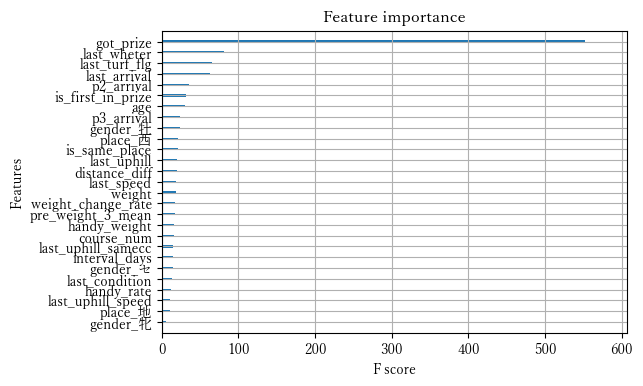

In [159]:
xgb.plot_importance(
    model,
#     cls_rdn.best_estimator_,
    importance_type='gain',
    show_values=False,
    max_num_features=40
)
plt.savefig(log_path/'image/feature_importance.png', pad_inches=.05, bbox_inches='tight')

In [160]:
df_score = pd.DataFrame(columns=['acc', 'rec', 'prec', 'f1'])
for th in np.arange(0, 1, 0.05):
    th = round(th, 2)
    tmp = np.where(prob2 < th, 0, 1)
    acc = accuracy_score(y_test, tmp)
    rec = recall_score(y_test, tmp)
    prec = precision_score(y_test, tmp)
    f1 = f1_score(y_test, tmp)
    df_score.loc[th] = [acc, rec, prec, f1]
df_score.index.name = 'thresh'

df_score.to_csv(log_path/'score.csv', encoding='utf-8-sig')

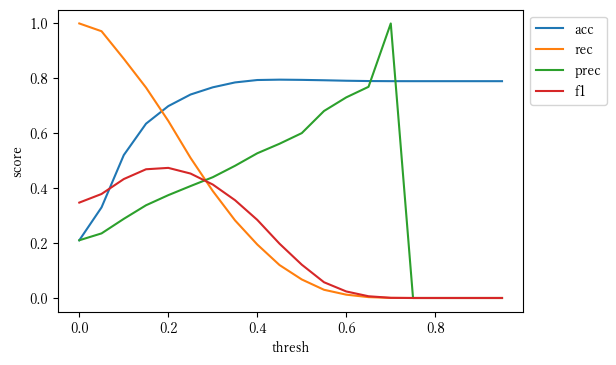

In [161]:
df_score.plot()
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('score')
plt.savefig(log_path/'image/score_by_th.png', pad_inches=.05, bbox_inches='tight')

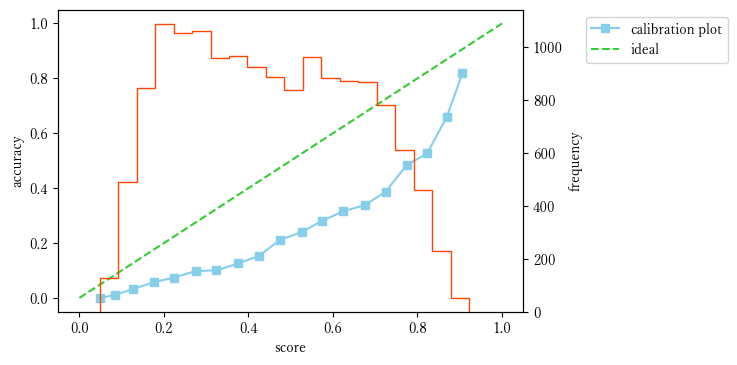

In [162]:
prob_true, prob_pred = calibration_curve(y_true=y_test, y_prob=y_pred_prob, n_bins=20)

fig, ax1 = plt.subplots()
ax1.plot(prob_pred, prob_true, marker='s', label='calibration plot', color='skyblue')
ax1.plot([0, 1], [0, 1], linestyle='--', label='ideal', color='limegreen')
ax1.legend(bbox_to_anchor=(1.12, 1), loc='upper left')
ax2 = ax1.twinx()
ax2.hist(y_pred_prob, bins=20, histtype='step', color='orangered')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('score')
ax2.set_ylabel('frequency')
# fig.savefig(log_path/'image/calibration_plot.png', bbox_inches='tight', pad_inche=.05)
plt.show()

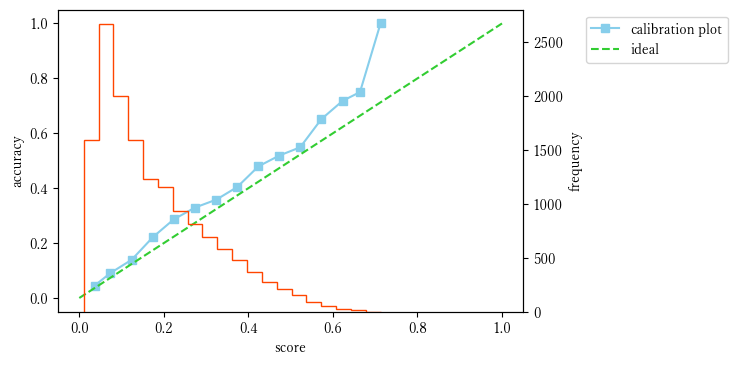

In [163]:
prob_true, prob_pred = calibration_curve(y_true=y_test, y_prob=prob2, n_bins=20)

fig, ax1 = plt.subplots()
ax1.plot(prob_pred, prob_true, marker='s', label='calibration plot', color='skyblue')
ax1.plot([0, 1], [0, 1], linestyle='--', label='ideal', color='limegreen')
ax1.legend(bbox_to_anchor=(1.12, 1), loc='upper left')
ax2 = ax1.twinx()
ax2.hist(prob2, bins=20, histtype='step', color='orangered')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('score')
ax2.set_ylabel('frequency')
fig.savefig(log_path/'image/calibration_plot.png', bbox_inches='tight', pad_inche=.05)
plt.show()

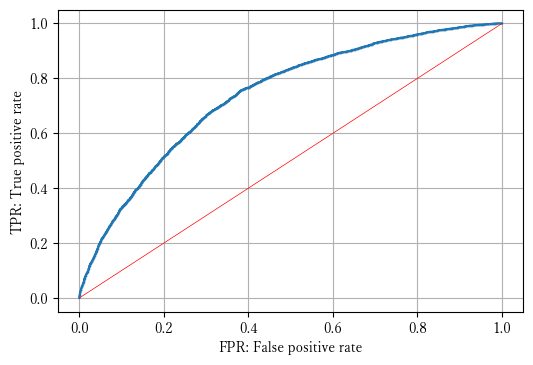

In [164]:
fpr_all, tpr_all, thresholds_all = roc_curve(y_test, y_pred_prob, drop_intermediate=False)
fig, ax = plt.subplots()
ax.plot(fpr_all, tpr_all, marker='o', markersize=.01)
ax.plot([0,1],[0,1], color='red', linewidth=.5)
ax.set_xlabel('FPR: False positive rate')
ax.set_ylabel('TPR: True positive rate')
ax.grid()
fig.savefig(log_path/'image/roc_plot.png', bbox_inches='tight', pad_inche=.05)

In [165]:
roc_auc_score(y_test, y_pred_prob)

0.7400988687517267

In [166]:
dt_now

'202012061919'

In [167]:
df_train

,arrival,馬名,race_id,race_date,first_data_flg,weight_null_flg,last_turf_flg,last_wheter,last_condition,is_first_in_prize,same_cluster_flg,is_same_place,gender_セ,gender_牝,gender_牡,place_なし,place_地,place_外,place_東,place_西,weight,weight_change_rate,handy_rate,handy_weight,age,interval_days,distance_diff,last_speed,last_uphill_speed,last_uphill,last_uphill_samecc,pre_weight_3_mean,got_prize,course_num,last_arrival,p2_arrival,p3_arrival,target
0,9,スリースペシャル,201201010101,2012-07-21,0,0,1,1.0,1.0,0,0,0,0,0,1,0,0,0,0,1,-0.288009,0.000000,-0.587379,-2.828427,0.000000,-1.392631,-2.695819,2.422728,-1.899604,0.189358,0.279713,0.000000,-2.000000,0.000000,1.000000,0.000000,-2.000,0
1,1,アウトシャイン,201201010101,2012-07-21,0,0,1,3.0,2.0,0,0,0,0,1,0,0,0,0,0,1,-0.720023,-2.000000,0.775686,0.353553,0.000000,2.340805,0.215666,-0.857141,1.311880,0.946792,1.013961,-2.000000,1.496492,0.777778,0.000000,-2.000000,-2.000,1
2,6,コスモソーク,201201010101,2012-07-21,0,0,1,1.0,1.0,0,0,1,0,0,1,0,0,0,1,0,1.656053,-2.000000,-1.423689,0.353553,0.000000,0.340750,0.215666,-0.410520,0.148863,-0.315597,-0.209785,-2.000000,0.299298,0.222222,0.125000,-2.000000,-2.000,0
3,4,ユキカゼ,201201010101,2012-07-21,0,0,1,1.0,1.0,0,0,0,0,0,1,0,0,0,0,1,1.152037,-2.000000,-1.006264,0.353553,0.000000,0.340750,0.215666,-0.320337,0.071102,-0.315597,-0.209785,-2.000000,-1.068923,0.666667,0.375000,-2.000000,-2.000,0
4,2,マイネルブルズアイ,201201010101,2012-07-21,0,0,0,-2.0,-2.0,1,0,1,0,0,1,0,0,0,1,0,-0.360012,-2.000000,0.401161,0.353553,0.000000,-0.459272,1.186161,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,1.000000,-2.000000,-2.000000,-2.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148562,16,ダイシンステルラ,201910021212,2019-09-01,0,0,0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,1,-1.284832,0.718404,1.164040,0.238283,0.301511,-0.137629,1.025320,-1.612326,0.585796,-0.213449,-1.196459,-1.729250,-2.000000,0.200000,1.000000,0.307692,1.000,0
148563,11,マセラシオン,201910021212,2019-09-01,0,0,1,1.0,1.0,0,0,1,0,1,0,0,0,0,0,1,-1.482499,-1.193582,1.337010,0.238283,0.301511,-0.760433,0.225070,-0.630987,-0.684380,-0.849255,-0.531048,-1.305956,-2.000000,1.000000,0.538462,0.307692,0.625,0
148564,4,オーラロード,201910021212,2019-09-01,0,0,1,2.0,3.0,0,0,1,1,0,0,0,0,0,0,1,-0.494166,-0.525920,1.179090,1.327575,0.301511,-0.604732,-0.575180,1.401660,2.269097,2.584096,-1.196459,-0.382407,-2.000000,0.533333,0.769231,0.461538,-2.000,0
148565,8,シゲルヒカルダイヤ,201910021212,2019-09-01,0,0,0,-2.0,-2.0,1,0,1,0,0,1,0,0,0,0,1,2.174331,2.374541,-2.645977,-1.940303,-0.904534,0.785457,1.025320,-2.000000,-2.000000,-2.000000,-2.000000,1.618616,-2.000000,0.600000,-2.000000,-2.000000,-2.000,0


In [168]:
X_train.shape

(56614, 33)

In [169]:
df_train.shape

(133629, 38)

0.7564492177603688


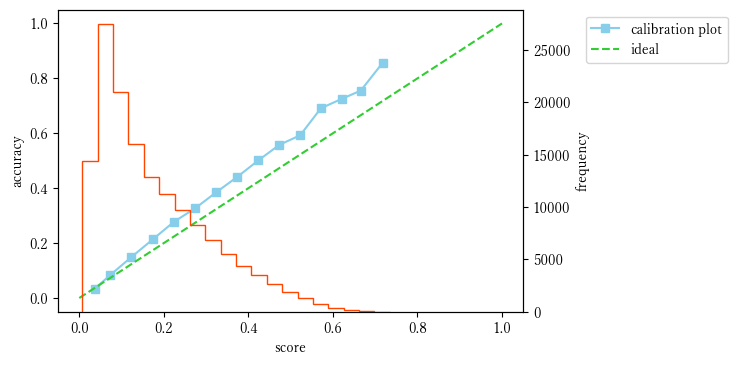

In [170]:
y_pred_all = model.predict(xgb.DMatrix(df_use[X_cols]))
y_all = df_use['target']
prob3 = y_pred_all / (y_pred_all + (1 - y_pred_all) / s_rate)

print(roc_auc_score(y_all, y_pred_all))

prob_true, prob_pred = calibration_curve(y_true=y_all, y_prob=prob3, n_bins=20)
fig, ax1 = plt.subplots()
ax1.plot(prob_pred, prob_true, marker='s', label='calibration plot', color='skyblue')
ax1.plot([0, 1], [0, 1], linestyle='--', label='ideal', color='limegreen')
ax1.legend(bbox_to_anchor=(1.12, 1), loc='upper left')
ax2 = ax1.twinx()
ax2.hist(prob3, bins=20, histtype='step', color='orangered')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('score')
ax2.set_ylabel('frequency')
plt.show()

In [171]:
df_use['pred_prob'] = prob3
df_use[['arrival', '馬名', 'race_id', 'pred_prob']].to_csv(data_path/f'tmp/{dt_now}_all.csv', index=False, encoding='cp932')

In [172]:
df_test['pred_prob'] = prob2
df_test[['arrival', '馬名', 'race_id', 'pred_prob']].to_csv(data_path/f'tmp/{dt_now}.csv', index=False, encoding='cp932')

In [174]:
with open(log_path/'model_config.json', 'w') as f:
    json.dump({
            'ss_col': ss_col, 
            'mm_col': mm_col,
            'TARGET_VALUE': TARGET_VALUE,
            'FILL_VALUE': FILL_VALUE,
            'params': params,
            'num_round': num_round
        },
        f,
        indent=4
    )

In [175]:
df_sampling.loc['test', 'num_id'] = len(valid_id)
df_sampling.loc['All', 'num_id'] = df_use.race_id.nunique()

df_sampling.to_csv(log_path/'data_num.csv', encoding='utf-8-sig')

In [176]:
# COMMENT = '標準化と正規化を混ぜた'

In [177]:
with open(data_path/'logs/AUC.csv', 'a') as f:
    writer = csv.writer(f, lineterminator='\n') # 行末は改行
    writer.writerow([dt_now, roc_auc_score(y_test, y_pred_prob), TARGET_VALUE, COMMENT])